In [473]:
import pandas as pd
import numpy as numpy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles,make_regression
import matplotlib.pyplot as plt


## **First we will apply dropout on regression datasets**

In [474]:
X,y=make_regression(n_samples=20,n_features=1,noise=20,random_state=1)

In [475]:

X.shape,y.shape

((20, 1), (20,))

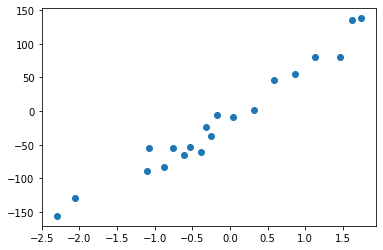

In [476]:
plt.scatter(X[:,0],y)

In [477]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [478]:

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16, 1), (4, 1), (16,), (4,))

# **Model1 is used without droupout**

In [479]:

model1=Sequential()
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal',input_dim=1))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))

model1.add(Dense(1,activation='linear'))
model1.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 128)               256       
                                                                 
 dense_235 (Dense)           (None, 128)               16512     
                                                                 
 dense_236 (Dense)           (None, 128)               16512     
                                                                 
 dense_237 (Dense)           (None, 128)               16512     
                                                                 
 dense_238 (Dense)           (None, 128)               16512     
                                                                 
 dense_239 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,433
Trainable params: 66,433
Non-tra

In [480]:

model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [481]:

history1=model1.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=30)

Epoch 1/1000
1/1 [==============================] - 1s 582ms/step - loss: 6487.3672 - mse: 6487.3672 - val_loss: 5962.1646 - val_mse: 5962.1646
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 6208.6060 - mse: 6208.6060 - val_loss: 5654.7842 - val_mse: 5654.7842
Epoch 3/1000
1/1 [==============================] - 0s 26ms/step - loss: 5961.5835 - mse: 5961.5835 - val_loss: 5361.5127 - val_mse: 5361.5127
Epoch 4/1000
1/1 [==============================] - 0s 25ms/step - loss: 5740.5845 - mse: 5740.5845 - val_loss: 5062.4326 - val_mse: 5062.4326
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 5507.5322 - mse: 5507.5322 - val_loss: 4755.6152 - val_mse: 4755.6152
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 5263.8960 - mse: 5263.8960 - val_loss: 4433.4458 - val_mse: 4433.4458
Epoch 7/1000
1/1 [==============================] - 0s 27ms/step - loss: 5002.8643 - mse: 5002.8643 - val_loss: 4089.1392 - val_mse: 4089.139

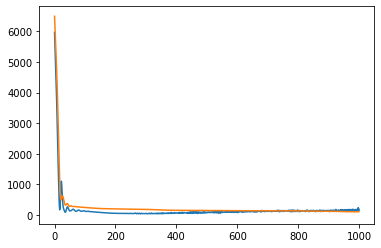

In [482]:

plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])
plt.show()

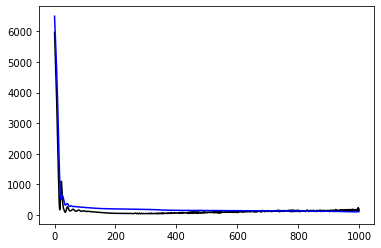

In [483]:
plt.plot(history1.history['val_mse'],c='black')
plt.plot(history1.history['mse'],c='blue')
plt.show()

In [484]:
train_mse=model1.evaluate(X_train,y_train,verbose=0)
test_mse=model1.evaluate(X_test,y_test,verbose=0)
print(train_mse,test_mse)

[107.6976318359375, 107.6976318359375] [192.23202514648438, 192.23202514648438]


In [485]:
print(train_mse[0]-test_mse[0])

-84.53439331054688


In [486]:
y_pred=model1.predict(X_test)

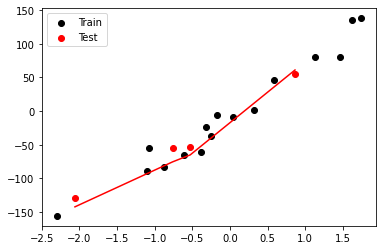

In [487]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='Train') 
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred,c='red')
plt.legend()
plt.show()

# **Model2 is used with dropout**

In [497]:
model2=Sequential()
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal',input_dim=1))
model2.add(Dropout(0.1))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.1))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.1))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.1))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.1))



model2.add(Dense(1,activation='linear'))
model2.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_246 (Dense)           (None, 128)               256       
                                                                 
 dropout_95 (Dropout)        (None, 128)               0         
                                                                 
 dense_247 (Dense)           (None, 128)               16512     
                                                                 
 dropout_96 (Dropout)        (None, 128)               0         
                                                                 
 dense_248 (Dense)           (None, 128)               16512     
                                                                 
 dropout_97 (Dropout)        (None, 128)               0         
                                                                 
 dense_249 (Dense)           (None, 128)             

In [498]:

model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [499]:

history2=model2.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=30)

Epoch 1/1000
1/1 [==============================] - 1s 678ms/step - loss: 6660.9541 - mse: 6660.9541 - val_loss: 6245.4595 - val_mse: 6245.4595
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 6415.6304 - mse: 6415.6304 - val_loss: 6084.0249 - val_mse: 6084.0249
Epoch 3/1000
1/1 [==============================] - 0s 26ms/step - loss: 6208.5205 - mse: 6208.5205 - val_loss: 5944.6909 - val_mse: 5944.6909
Epoch 4/1000
1/1 [==============================] - 0s 25ms/step - loss: 6095.7363 - mse: 6095.7363 - val_loss: 5815.2588 - val_mse: 5815.2588
Epoch 5/1000
1/1 [==============================] - 0s 27ms/step - loss: 5991.0869 - mse: 5991.0869 - val_loss: 5670.4175 - val_mse: 5670.4175
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 5854.3213 - mse: 5854.3213 - val_loss: 5508.1191 - val_mse: 5508.1191
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 5794.1221 - mse: 5794.1221 - val_loss: 5329.6416 - val_mse: 5329.641

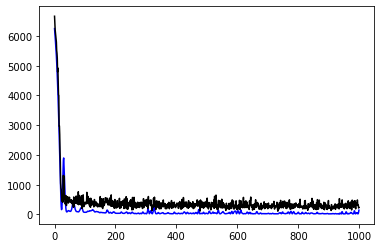

In [500]:

plt.plot(history2.history['val_loss'],c='blue')
plt.plot(history2.history['loss'],c='black')
plt.show()

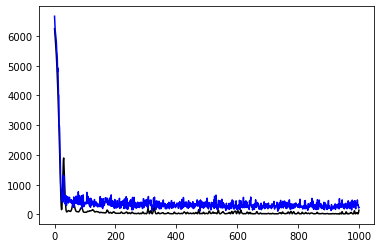

In [501]:

plt.plot(history2.history['val_mse'],c='black')
plt.plot(history2.history['mse'],c='blue')
plt.show()

In [502]:
train_mse2=model2.evaluate(X_train,y_train,verbose=0)
test_mse2=model2.evaluate(X_test,y_test,verbose=0)
print(train_mse2,test_mse2)

[204.64511108398438, 204.64511108398438] [143.80426025390625, 143.80426025390625]


In [503]:
y_pred2=model2.predict(X_test)

## **Below we can see difference between train_mse and test_mse without droupout and also train_mse2 and test_mse2 with dropout and from the result we can see that gap in case of dropout is less that without dropout**

In [504]:
print(train_mse[0]-test_mse[0])

-84.53439331054688


In [505]:
print(train_mse2[0]-test_mse2[0])

60.840850830078125
